## <span style="font-family: Georgia; font-weight:bold;font-size:1.5em;">Cement manufacturing</span>

### Import packages

In [71]:
import pandas  as pd
import numpy as np
from scipy.stats import randint as sp_randint

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist

In [2]:
#Used for Styling
class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Deliverable -1

In [3]:
data=pd.read_csv("concrete.csv",delimiter=',')
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

#### Univariate Analysis

In [4]:
print("The DataSet has {} rows and  {} columns".format(data.shape[0],data.shape[1]))

The DataSet has 1030 rows and  9 columns


In [5]:
print(color.UNDERLINE+'The information of the data set:::'+color.END)
data.info()

The information of the data set:::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

Independent variables are as follows :

1.cement
2.slag
3.ash
4.water
5.superplastic
6.coarseagg
7.fineagg
8.age

Dependent variables :

strength

In [7]:
print(color.UNDERLINE+'Checking if any columns are null :::'+color.END)
print(data.isnull().values.any())
print('\n')
print(color.UNDERLINE+'Total null values:::'+color.END)
print(data.isnull().sum().sum())

Checking if any columns are null :::
False


Total null values:::
0


In [8]:
dupes = data.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet::'+color.END,sum(dupes))
data[data.duplicated()]

Duplicates in the DataSet:: 25


cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
298   425.0  106.3  0.0  153.5          16.5      852.1    887.1    3   
400   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
420   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
463   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
468   252.0    0.0  0.0  185.0           0.0     1111.0    784.0   28   
482   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
493   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
517   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
525   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
527   425.0  106.3  0.0  153.5          16.5      852.1    887.1   91   
576   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
577   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   
604   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
733   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
738   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
766   362.6  189.0  0.0  164.9          11.6      944.7    755.8   91   
830   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
880   425.0  106.3  0.0  153.5          16.5      852.1    887.1   56   
884   425.0  106.3  0.0  153.5          16.5      852.1    887.1    7   
892   362.6  189.0  0.0  164.9          11.6      944.7    755.8   56   
933   362.6  189.0  0.0  164.9          11.6      944.7    755.8    7   
943   362.6  189.0  0.0  164.9          11.6      944.7    755.8    3   
967   362.6  189.0  0.0  164.9          11.6      944.7    755.8   28   
992   425.0  106.3  0.0  153.5          16.5      852.1    887.1   28   

     strength  
278     33.40  
298     33.40  
400     35.30  
420     35.30  
463     77.30  
468     19.69  
482     65.20  
493     79.30  
517     64.30  
525     71.30  
527     65.20  
576     55.90  
577     60.29  
604     77.30  
733     79.30  
738     71.30  
766     79.30  
830     49.20  
880     64.30  
884     49.20  
892     77.30  
933     55.90  
943     35.30  
967     71.30  
992     60.29

Outliers in the DataSet::


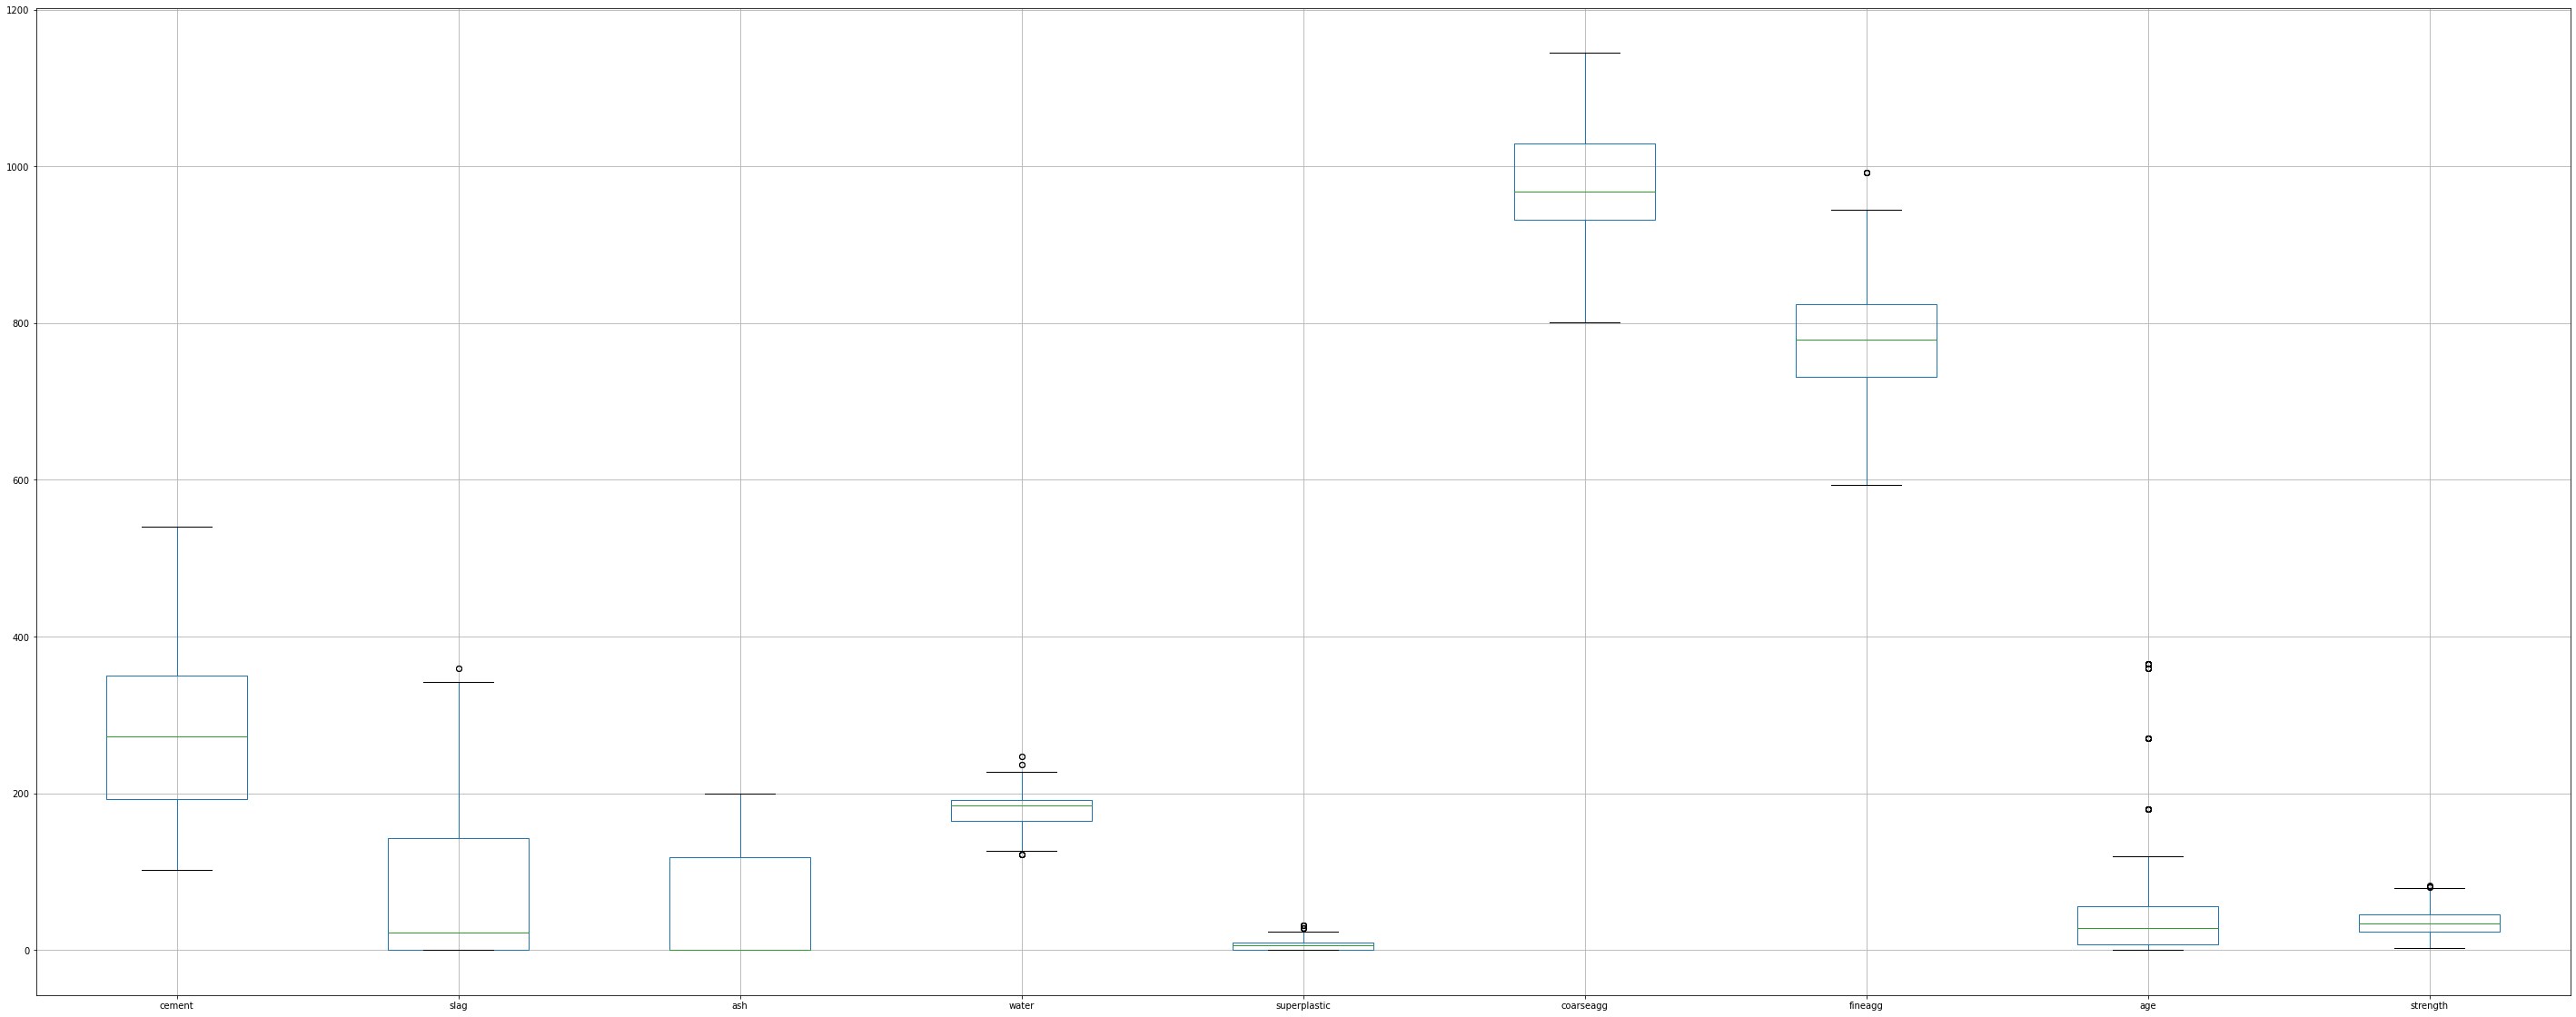

In [9]:
#Outliers
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet::'+color.END)
data.boxplot(return_type='axes',figsize=(50,20))

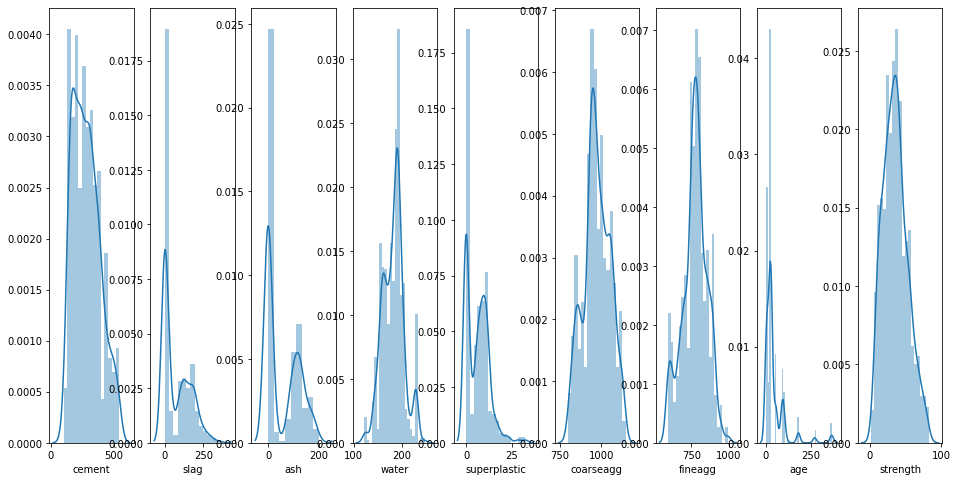

In [10]:
fig, ax = plt.subplots(1,9,figsize=(16,8)) 
sns.distplot(data['cement'],ax=ax[0]) 
sns.distplot(data['slag'],ax=ax[1]) 
sns.distplot(data['ash'],ax=ax[2])
sns.distplot(data['water'],ax=ax[3])
sns.distplot(data['superplastic'],ax=ax[4])
sns.distplot(data['coarseagg'],ax=ax[5])
sns.distplot(data['fineagg'],ax=ax[6])
sns.distplot(data['age'],ax=ax[7])
sns.distplot(data['strength'],ax=ax[8])

Observation :

1. Cement - It is normally distributed where have tail at right side
2. slag - It is bi-modal Distribution where we can see 2 clusters/peaks - even this have tail at right side
3. ash - Bi-modal & 2 Clusters/peaks - Have tail at right side
4. water - Can see 3-4  clusters/peaks and tail on left side
5. superplastic - 2 clusters/peaks - looks like tail at right side
6. coarseagg- 3 clusters/peaks  - looks like tails is not present
7. fineagg - 2 clusters/peaks - Have slight tail at the right hand side
8. age - 5 clusters /peaks
9. Strength - looks like a normal distribution

#### Multivariate Analysis

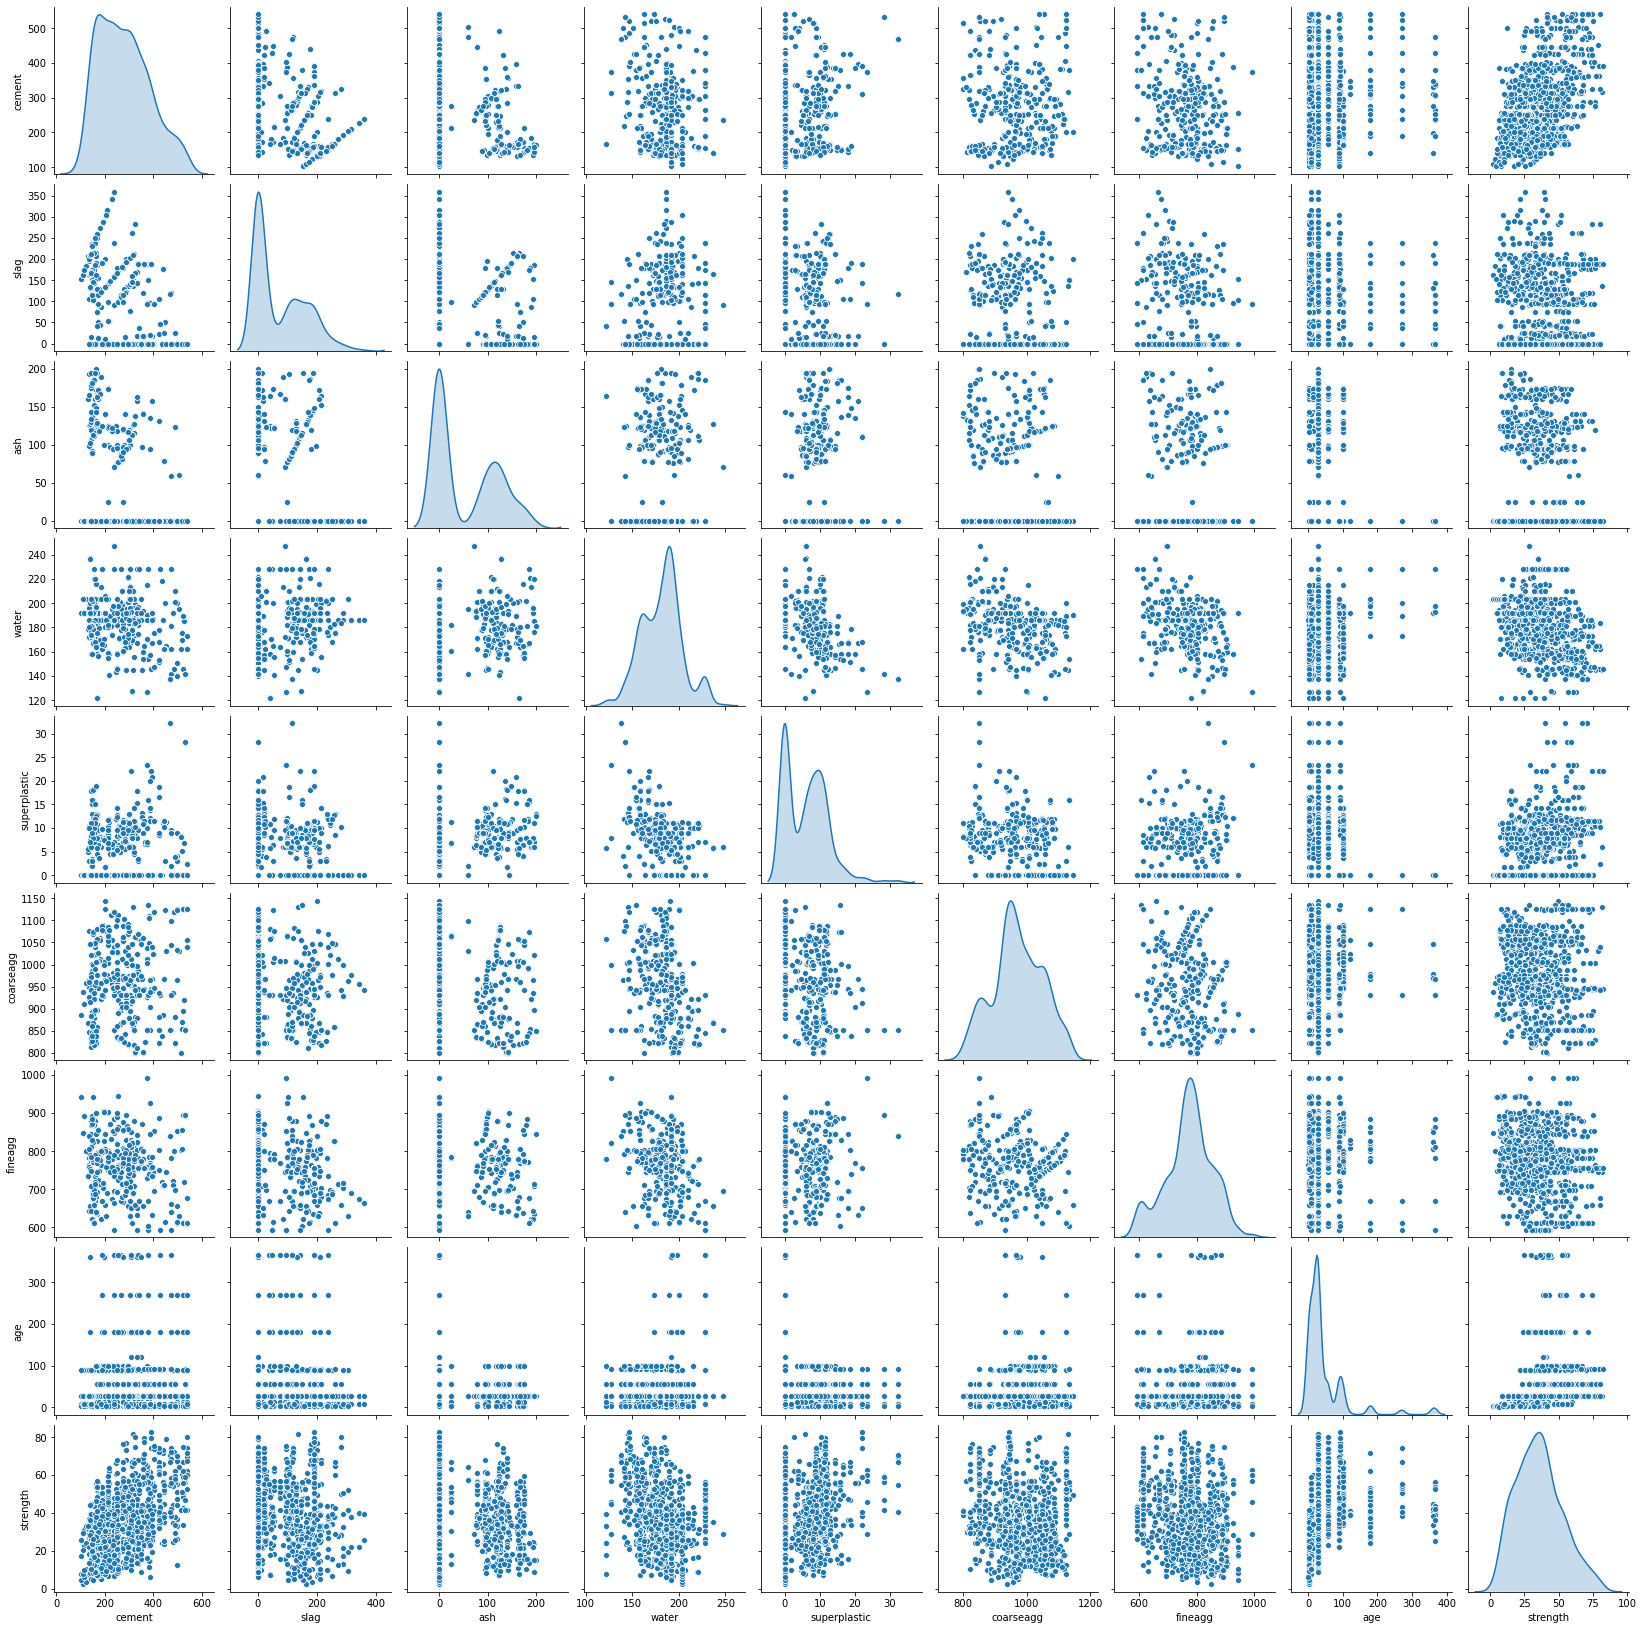

In [11]:
sns.pairplot(data,diag_kind='kde')

Observations :

1. It looks like from the dataset we can say minimum 2 Gaussians / Clusters are present and max we can say there are 5-6 Clusters/Gaussians
2. As from the above pair plot we can say that each attribute looks independent to each other  - we'll conclude this based on correlation value
    


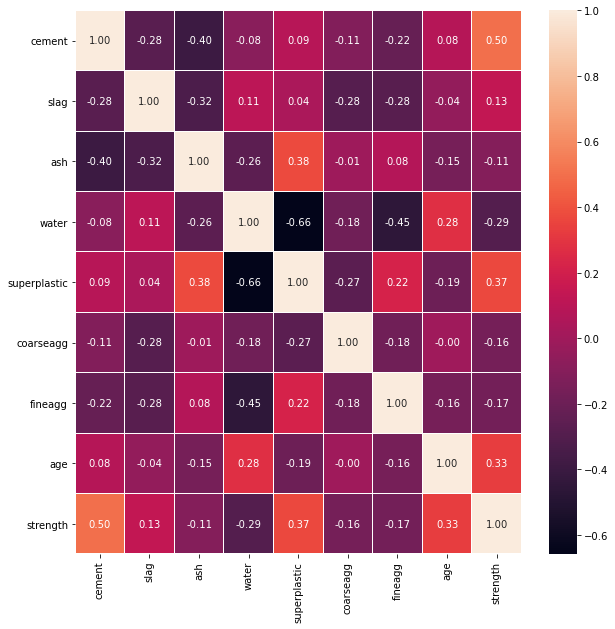

In [12]:
corr=data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidth=0.05,ax=ax, fmt= '.2f');

We can see that there is no high correlation between any two attributes. But negative correlation is between

1. Superplastics vs water
2. fineagg vs water

#### Performing data clean and scaling

In [13]:
### Remove duplicates 
dupes = data.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet before::'+color.END,sum(dupes))

data_clean= data.copy()
data_clean=data_clean.drop_duplicates(keep="first")

dupes1 = data_clean.duplicated()
print(color.UNDERLINE+color.BOLD+'Duplicates in the DataSet After::'+color.END,sum(dupes1))



Duplicates in the DataSet before:: 25
Duplicates in the DataSet After:: 0


In [14]:
# Remove Outliers
def remove_outliers(col):
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    for i in np.where(data_clean[col] > Q3 + 1.5 * IQR):
        data_clean[col].iloc[i] = Q3 + 1.5 * IQR
    return data_clean[col]

In [15]:
col=data_clean.columns

In [16]:
for i in col:
    if(i != 'strength'):
        remove_outliers(i)

In [17]:
print(color.UNDERLINE+color.BOLD+'Outliers in the DataSet after removing them::'+color.END)
data_clean.boxplot(return_type='axes',figsize=(50,20))

Outliers in the DataSet after removing them::


In [18]:
# Dealing with the missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit_transform(data_clean)

data_imputed=pd.DataFrame(imputer.transform(data_clean))
data_imputed.columns=col

data_imputed

cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28.0   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14.0   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28.0   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28.0   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28.0   
...      ...    ...    ...    ...           ...        ...      ...    ...   
1000   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28.0   
1001   531.3    0.0    0.0  141.8          25.0      852.1    893.7    3.0   
1002   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28.0   
1003   342.0   38.0    0.0  228.0           0.0      932.0    670.0  129.5   
1004   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7.0   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1000     13.29  
1001     41.30  
1002     44.28  
1003     55.06  
1004     52.61  

[1005 rows x 9 columns]

#### Data Scaling


In [19]:
# independant variables
X = data_imputed.drop(['strength'], axis=1)
# the dependent variable
y = data_imputed[['strength']]

In [20]:
data_imputed_scaled=data_imputed.apply(zscore)
X_scaled=X.apply(zscore)
X_scaled.head()

y_scaled=y.apply(zscore)

### Deliverable -2

To check whether to drop any features we'll apply PCA (Principal Component analysis)  so that we'll include only few attributes

##### a. Feature Engineering

In [21]:
pca = PCA(n_components=8)
pca.fit(X_scaled)

PCA(n_components=8)

In [22]:
#eigen_vectors
print('eigen vectors:::')
print(pca.components_)
print('')
#eigen_values
print('Eigen Values:::')
print(pca.explained_variance_)

eigen vectors:::
[[ 0.12631673  0.20569793 -0.4339613   0.54600243 -0.51107441  0.01167015
  -0.39453098  0.19571265]
 [ 0.45029212 -0.67333674 -0.06986528 -0.1343776  -0.17602043  0.51275229
   0.00859952  0.16414656]
 [ 0.70885173  0.09565379 -0.35417359 -0.16796804  0.35078359 -0.45528279
  -0.05341587 -0.03927578]
 [ 0.03978726  0.31567192 -0.19698797 -0.27888171  0.02933201  0.50203882
  -0.33536655 -0.64561202]
 [ 0.0977762   0.04074725  0.49882712  0.04209748  0.33943262  0.07713425
  -0.72318357  0.30662698]
 [-0.13931016  0.38557059 -0.34194446 -0.39462182  0.14974735  0.3208261
   0.12295066  0.64715152]
 [ 0.21728556  0.23058396  0.36705357 -0.51757645 -0.66546229 -0.22040021
  -0.04517357  0.05955968]
 [ 0.4483824   0.43819357  0.3769223   0.39045073  0.05857837  0.34665281
   0.43450591  0.0047385 ]]

Eigen Values:::
[2.26233202 1.43141475 1.25932767 1.02410857 0.9771344  0.84638138
 0.17664813 0.0306212 ]


In [23]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

##### Cumulative variance

In [24]:
print(pca.explained_variance_ratio_)

cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cum_var_exp,columns=['Cumul Variance Explanation'],index=['1','2','3','4','5','6','7','8'])

[0.28251012 0.17874881 0.15725933 0.12788619 0.12202027 0.1056924
 0.02205904 0.00382384]


Cumul Variance Explanation
1                    0.282510
2                    0.461259
3                    0.618518
4                    0.746404
5                    0.868425
6                    0.974117
7                    0.996176
8                    1.000000

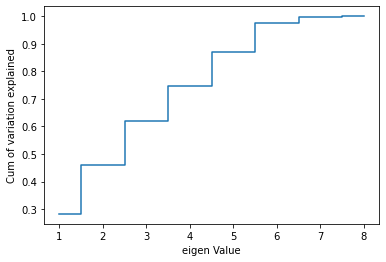

In [25]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

So we can say that 6 attributes give 95% of the dataset variance. So we'll take these 6 variables

In [26]:
pca6 = PCA(n_components=6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_scaled)
Xpca6

[[ 0.12631673  0.20569793 -0.4339613   0.54600243 -0.51107441  0.01167015
  -0.39453098  0.19571265]
 [ 0.45029212 -0.67333674 -0.06986528 -0.1343776  -0.17602043  0.51275229
   0.00859952  0.16414656]
 [ 0.70885173  0.09565379 -0.35417359 -0.16796804  0.35078359 -0.45528279
  -0.05341587 -0.03927578]
 [ 0.03978726  0.31567192 -0.19698797 -0.27888171  0.02933201  0.50203882
  -0.33536655 -0.64561202]
 [ 0.0977762   0.04074725  0.49882712  0.04209748  0.33943262  0.07713425
  -0.72318357  0.30662698]
 [-0.13931016  0.38557059 -0.34194446 -0.39462182  0.14974735  0.3208261
   0.12295066  0.64715152]]
[0.28251012 0.17874881 0.15725933 0.12788619 0.12202027 0.1056924 ]


array([[ 1.69319755, -1.64457419, -0.96573538,  0.58426996, -0.67762695,
         0.32096873],
       [-1.94208958,  0.28273595, -1.28947903,  0.99785465,  0.34257283,
         0.25592746],
       [-0.79216452,  0.2246534 , -0.51375622, -0.77444317, -0.6714826 ,
        -0.72862622],
       ...,
       [-0.50578159, -1.20176258,  0.66618698, -0.37515594,  0.3059165 ,
        -0.48362604],
       [ 3.08613578,  0.62069939,  0.1861152 , -2.05566585,  1.01511066,
         0.36548405],
       [ 1.46183457,  2.83003679,  0.963942  ,  2.29805128,  0.73306311,
        -0.54744211]])

In [27]:
print('Independent Variables:')
print(Xpca6)
print('')
print('Dependent Variable::')
print(y_scaled)

Independent Variables:
[[ 1.69319755 -1.64457419 -0.96573538  0.58426996 -0.67762695  0.32096873]
 [-1.94208958  0.28273595 -1.28947903  0.99785465  0.34257283  0.25592746]
 [-0.79216452  0.2246534  -0.51375622 -0.77444317 -0.6714826  -0.72862622]
 ...
 [-0.50578159 -1.20176258  0.66618698 -0.37515594  0.3059165  -0.48362604]
 [ 3.08613578  0.62069939  0.1861152  -2.05566585  1.01511066  0.36548405]
 [ 1.46183457  2.83003679  0.963942    2.29805128  0.73306311 -0.54744211]]

Dependent Variable::
      strength
0    -0.329328
1    -0.721299
2    -0.370491
3     0.651214
4    -1.042003
...        ...
1000 -1.349190
1001  0.371673
1002  0.554757
1003  1.217053
1004  1.066531

[1005 rows x 1 columns]


##### b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

Here in the model building i am going to apply both the linear and polynomial regression and compare it's complexity in forthcoming section

1. Linear Regression
2. Polynomial Features

2. SVR
3. Ridge Regression
4. Lasso Regression

6. Decision Tree
7. Random Forest
8. Bagging
9. Ada Boost
10. Gradient Boost

##### c. Explore Gaussians

Here we grouping data into clusters . Min 1 to Max 6 as from our pair plot where we can see min 1 peak and max of 5-6 peaks

Using K-Means Clustering to divide the data in to  clusters

Here applying cluster check for both Scaled and unscaled data . Applying to data with only 6 attributes and taking the best cluster value

In [28]:
def cluster_check(d):
    clusters=range(1,7)
    meanDistortions=[]
    for k in clusters:
        model=KMeans(n_clusters=k)
        model.fit(d)
        prediction=model.predict(d)
        meanDistortions.append(sum(np.min(cdist(d, model.cluster_centers_, 'euclidean'), axis=1)) / d.shape[0])
    #To plot the graph
    plt.plot(clusters, meanDistortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Average distortion')
    plt.title('Selecting k with the Elbow Method')


For Unscaled data : 3 Clusters are best from the Elbow Method


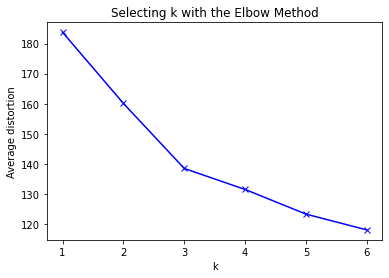

In [29]:
print('For Unscaled data : 3 Clusters are best from the Elbow Method')
cluster_check(data_imputed)


For scaled data : 2 Clusters are best from the Elbow Method


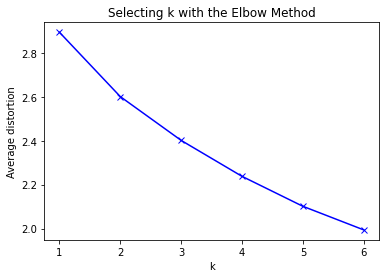

In [30]:

print('For scaled data : 2 Clusters are best from the Elbow Method')
cluster_check(data_imputed_scaled)

In [31]:
print('Checking Elbow method for only 6 attributes')
cluster_check(Xpca6)

Checking Elbow method for only 6 attributes


We can say that 2 clusters looks good so applying 2 clusters

In [32]:
# Let us first start with K = 3
final_model=KMeans(2)
final_model.fit(data_imputed_scaled)
prediction=final_model.predict(data_imputed_scaled)

#Append the prediction 
data_imputed_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
data_imputed_scaled.head()

Groups Assigned : 



cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.316792  1.625450 -0.865375  1.011058     -1.045420  -0.033232 -0.300903   
1 -1.052152 -0.346513  1.071486 -1.118210      0.842159   1.372475  0.295376   
2 -0.274530 -0.836600  0.625836  0.252624     -0.084153  -0.225388  1.107915   
3 -0.121115  0.487332 -0.865375  2.165196     -1.045420  -0.546508 -1.282201   
4 -1.187348  1.293305 -0.865375  0.530559      0.545040   0.941736 -0.948435   

        age  strength  GROUP  
0 -0.281105 -0.329328      1  
1 -0.671679 -0.721299      0  
2 -0.281105 -0.370491      0  
3 -0.281105  0.651214      1  
4 -0.281105 -1.042003      1

In [33]:
techSuppClust = data_imputed_scaled.groupby(['GROUP'])
techSuppClust.mean()

cement      slag       ash     water  superplastic  coarseagg  \
GROUP                                                                    
0     -0.088471 -0.118934  0.614104 -0.501966      0.666230  -0.169638   
1      0.118786  0.159687 -0.824531  0.673969     -0.894518   0.227766   

        fineagg       age  strength  
GROUP                                
0      0.213624 -0.109405  0.221093  
1     -0.286823  0.146894 -0.296852

In [34]:
data_imputed_scaled.boxplot(by='GROUP', layout = (3,3),figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B5506D3D0>,
      dtype=object)

In [35]:
def lmplot(var):
    with sns.axes_style("white"):
        plot = sns.lmplot(var,'strength',data=data_imputed_scaled,hue='GROUP')
    plot.set(ylim = (-3,3));

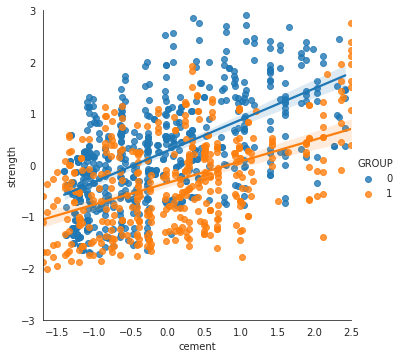

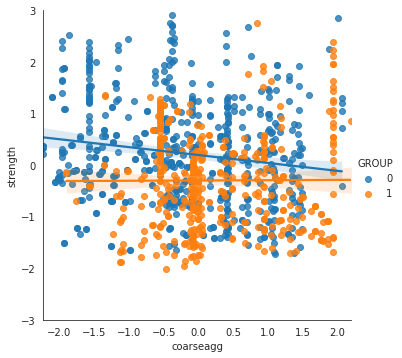

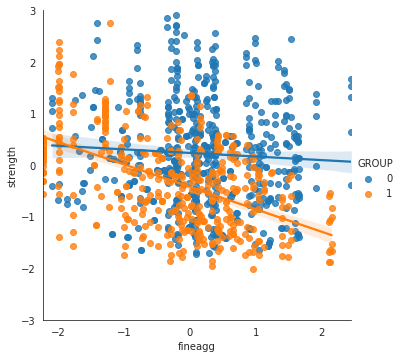

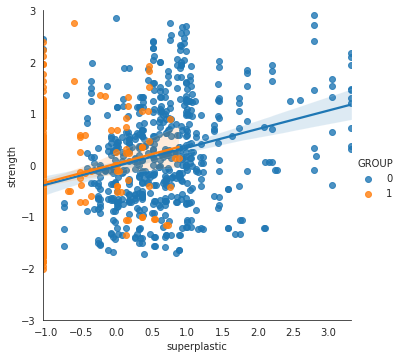

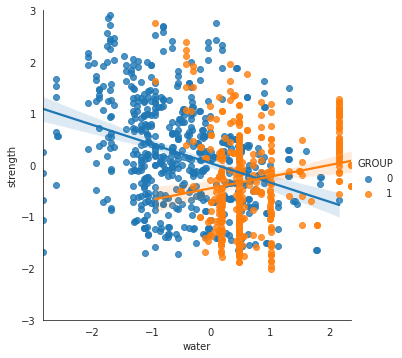

In [36]:

lmplot('cement')
lmplot('age')
lmplot('ash')
lmplot('coarseagg')
lmplot('fineagg')
lmplot('superplastic')
lmplot('water')

Observations :

1. Straight line -- means there is week relation between that cluster and varaible. Below are few cases
     
     Coarseagg : weak relation between the cluster 0 of coarseagg and strength
    
     ash : weak relation between the cluster 0 of ash and strength
  
     fineagg : fineagg cluster 1

2. Positive Correlation between cluster and variable:
    
    Cement : Both the cluster's in Cement have positive correlation with strength
    
    age : Both the cluster's in age have positive correlation with strength
    
    superplastic : Both the cluster's in superplastic have positive correlation with strength
    
    Water : Cluster 0 of water have positive correlation with strength
    
3. Negative Correlation between cluster and Varaible

   Cluster 1 of water with Strength
   
   Cluster 0 of fineagg
   
   Cluster 1 of ash

### Deliverable -3

Here i am using only 6 attributes which we get from PCA for model building

Here dividing the dataset into 3 parts - Train, validate and test
60% - train set,
20% - validation set,
20% - test set

Where train is used in this section where Validate will be used in next section while doing the hyperparameter tuning

Here Xpca6 is the set we are dividing into train , validate and test - First divide into 60:40 and again divide 40 into validate and test

In [37]:
print('Independent Variables:')
print(Xpca6)
print('')
print('Dependent Variable::')
print(y_scaled)

Independent Variables:
[[ 1.69319755 -1.64457419 -0.96573538  0.58426996 -0.67762695  0.32096873]
 [-1.94208958  0.28273595 -1.28947903  0.99785465  0.34257283  0.25592746]
 [-0.79216452  0.2246534  -0.51375622 -0.77444317 -0.6714826  -0.72862622]
 ...
 [-0.50578159 -1.20176258  0.66618698 -0.37515594  0.3059165  -0.48362604]
 [ 3.08613578  0.62069939  0.1861152  -2.05566585  1.01511066  0.36548405]
 [ 1.46183457  2.83003679  0.963942    2.29805128  0.73306311 -0.54744211]]

Dependent Variable::
      strength
0    -0.329328
1    -0.721299
2    -0.370491
3     0.651214
4    -1.042003
...        ...
1000 -1.349190
1001  0.371673
1002  0.554757
1003  1.217053
1004  1.066531

[1005 rows x 1 columns]


#### Spliting data into 60% training , 20% validate and 20% Test

In [38]:
x_train, x_valtest, y_train, y_valtest = train_test_split(Xpca6, y_scaled, test_size=0.4, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_train, y_train, test_size=0.4, random_state=1)


#### Building model on the train data

In [39]:
def R2_Score(model,x_train,y_train):
    print(model.score(x_train, y_train))
    

##### a. Linear Regression

In [40]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Linear Regression model on train data::'+color.END)
R2_Score(regression_model,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Linear Regression model on Validation data::'+color.END)
R2_Score(regression_model,x_val,y_val)

(R^2) Score of Linear Regression model on train data::
0.6901279373757276
(R^2) Score of Linear Regression model on Validation data::
0.6643160339255344


##### b. Polynomial Features

In [41]:
#Here using degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_val_poly = poly.fit_transform(x_val)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train_poly, y_train)
print(color.UNDERLINE+'(R^2) Score of Polynomial of degree 2 Linear Regression model on train data::'+color.END)
R2_Score(poly_clf,x_train_poly,y_train)
print(color.UNDERLINE+'(R^2) Score of Polynomial of degree 2 Linear Regression model on Validation data::'+color.END)
R2_Score(poly_clf,x_val_poly,y_val)

(R^2) Score of Polynomial of degree 2 Linear Regression model on train data::
0.7529724679939362
(R^2) Score of Polynomial of degree 2 Linear Regression model on Validation data::
0.7299906122762674


In [42]:
#Here using degree 3
poly = PolynomialFeatures(degree=3, interaction_only=True)
x_train_poly3 = poly.fit_transform(x_train)
x_test_poly3 = poly.fit_transform(x_test)
x_val_poly3 = poly.fit_transform(x_val)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(x_train_poly3, y_train)
print(color.UNDERLINE+'(R^2) Score of Polynomial of degree 3 Linear Regression model on train data::'+color.END)
R2_Score(poly_clf,x_train_poly3,y_train)
print(color.UNDERLINE+'(R^2) Score of Polynomial of degree 3 Linear Regression model on Validation data::'+color.END)
R2_Score(poly_clf,x_val_poly3,y_val)

(R^2) Score of Polynomial of degree 3 Linear Regression model on train data::
0.8157306975484713
(R^2) Score of Polynomial of degree 3 Linear Regression model on Validation data::
0.7916514773242644


##### c. SVR

In [43]:
svr_clf = svm.SVR()
svr_clf.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Linear Regression model on train data::'+color.END)
R2_Score(svr_clf,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Linear Regression model on Validation data::'+color.END)
R2_Score(svr_clf,x_val,y_val)

(R^2) Score of Linear Regression model on train data::
0.8809037583871746
(R^2) Score of Linear Regression model on Validation data::
0.8612529255821324


F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


##### d. Regularization models
##### d.1 .Ridge

In [44]:
ridge = Ridge(alpha=.3)
ridge.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Ridge regression on train data::'+color.END)
R2_Score(ridge,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Ridge regression on validation data::'+color.END)
R2_Score(ridge,x_val,y_val)

(R^2) Score of Ridge regression on train data::
0.6901277877574574
(R^2) Score of Ridge regression on validation data::
0.664302776513379


##### d.2 .Lasso

In [45]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Lasso regression on train data::'+color.END)
R2_Score(lasso,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Lasso regression on validation data::'+color.END)
R2_Score(lasso,x_val,y_val)

(R^2) Score of Lasso regression on train data::
0.6456100158292077
(R^2) Score of Lasso regression on validation data::
0.6177090702352427


##### e. Decision Tree

In [46]:
decision_clf = DecisionTreeRegressor(random_state=1,max_depth=5)
decision_clf.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Decision Tree regression on train data::'+color.END)
R2_Score(decision_clf,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Decision Tree regression on Validation data::'+color.END)
R2_Score(decision_clf,x_val,y_val)

(R^2) Score of Decision Tree regression on train data::
0.7790078600293717
(R^2) Score of Decision Tree regression on Validation data::
0.7504241836150266


##### e. Random Forest

In [47]:
random_clf=RandomForestRegressor()
random_clf.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Random Forest regression on train data::'+color.END)
R2_Score(random_clf,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Random Forest regression on Validation data::'+color.END)
R2_Score(random_clf,x_val,y_val)

<ipython-input-47-5f19606b9482>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_clf.fit(x_train, y_train)


(R^2) Score of Random Forest regression on train data::
0.9686399960180883
(R^2) Score of Random Forest regression on Validation data::
0.963270718864741


##### f. Bagging

In [48]:
bag_clf=BaggingRegressor()
bag_clf.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Bagging regression on train data::'+color.END)
R2_Score(bag_clf,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Bagging regression on Validation data::'+color.END)
R2_Score(bag_clf,x_val,y_val)

(R^2) Score of Bagging regression on train data::
0.9579276001254221
(R^2) Score of Bagging regression on Validation data::
0.9560348139267821


F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


##### g. Boosting Algorithms
#### g.1 ADABoost

In [49]:
adaboost_clf=AdaBoostRegressor()
adaboost_clf.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of ADABoost regression on train data::'+color.END)
R2_Score(adaboost_clf,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of ADABoost regression on Validation data::'+color.END)
R2_Score(adaboost_clf,x_val,y_val)

(R^2) Score of ADABoost regression on train data::
0.7723848969706225
(R^2) Score of ADABoost regression on Validation data::
0.7629734252978053


F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### g.2 GradientBoost

In [50]:
gradientboost_clf=GradientBoostingRegressor()
gradientboost_clf.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Gradient Boost regression on train data::'+color.END)
R2_Score(gradientboost_clf,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Gradient Boost regression on Validation data::'+color.END)
R2_Score(gradientboost_clf,x_val,y_val)

F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(R^2) Score of Gradient Boost regression on train data::
0.9252188907290717
(R^2) Score of Gradient Boost regression on Validation data::
0.9173974957802691


Observations :
1. As from a and b if the polynomial degree increases the score increases in  linear Regression model and polynomial features
2. Among all the models the accuracy score decreases compared to train data in validate data. But in the Random Forest the decrease is small
3. So Considering RandomForest in next section while checking on test data

### Deliverable -4
#### a. Algorithms that you think will be suitable for this project
Among all the above I am considering RandomForest Algorithm where it's accuracy on train and validate data is slighlt different
and applying RandamizedSearchCV and check how the accuracy is being changed
(R^2) Score of Random Forest regression on train data::
0.9686619665729648

(R^2) Score of Random Forest regression on Validation data::
0.9630783033756551

And i'm working on Gradient Boost Algorithm also and checking how its performance is effecting after applying RandamizedSearchCV

#### b. Algorithms that you think will be suitable for this project
##### b.1. RandomForest

Doing it on the validation data set

In [51]:
estimator = RandomForestRegressor()
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
search_grid={'n_estimators':[100,200,300,400,500,600],"criterion": ["mse", "mae"],"max_features": ["auto", "sqrt", "log2"],"bootstrap": [True, False],"min_samples_leaf": [1,2,3,4,5],"min_samples_split": [2,3,4,5]}
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(estimator, param_distributions=search_grid, n_iter=samples) 
randomCV.fit(x_val, y_val)
print(randomCV.best_params_)

F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column

{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'mse', 'bootstrap': False}


In [54]:
random_clf_param=RandomForestRegressor(bootstrap= False, criterion= 'mse', max_features= 'log2', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 200)
random_clf_param.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Random Forest regression on train data::'+color.END)
R2_Score(random_clf_param,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Random Forest regression on Validation data::'+color.END)
R2_Score(random_clf_param,x_val,y_val)

<ipython-input-54-1e1972c6f061>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_clf_param.fit(x_train, y_train)


(R^2) Score of Random Forest regression on train data::
0.9952372787225856
(R^2) Score of Random Forest regression on Validation data::
0.9925078462015415


##### b.2. GradientBoost

Doing it on the validation dataset

In [55]:
estimator1=GradientBoostingRegressor()
search_grid={'n_estimators':[100,200,300,400,500,600],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,3,4,5],'subsample':[.5,.75,1],'random_state':[1]}
samples = 10
search=RandomizedSearchCV(estimator1, param_distributions=search_grid, n_iter=samples) 
search.fit(x_val,y_val)
search.best_params_

F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'subsample': 0.5,
 'random_state': 1,
 'n_estimators': 500,
 'max_depth': 4,
 'learning_rate': 0.01}

In [57]:
GraBR = GradientBoostingRegressor(learning_rate= 0.01,max_depth= 4,n_estimators= 500,random_state= 1,subsample= 0.5)
GraBR.fit(x_train, y_train)
print(color.UNDERLINE+'(R^2) Score of Gradient Boost regression on train data::'+color.END)
R2_Score(GraBR,x_train,y_train)
print(color.UNDERLINE+'(R^2) Score of Gradient Boost regression on Validation data::'+color.END)
R2_Score(GraBR,x_val,y_val)

F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(R^2) Score of Gradient Boost regression on train data::
0.9240992259409867
(R^2) Score of Gradient Boost regression on Validation data::
0.9165960936458775


As we can see in Random Forest the performance increased and in Gradient Boost it is increased after applying RandamizedSearch CV

As from performance we can say Random Forest increased more than Gradient Boost but we'll check this accuracy with test data for these two algorithms
before applying and after applying RandamizedSearchCV


In [58]:
#Before
print(color.UNDERLINE+'Before:::(R^2) Score of Gradient Boost regression on Test data::'+color.END)
R2_Score(gradientboost_clf,x_test,y_test)
#After
print(color.UNDERLINE+'After:::(R^2) Score of Gradient Boost regression on Test data::'+color.END)
R2_Score(GraBR,x_test,y_test)

Before:::(R^2) Score of Gradient Boost regression on Test data::
0.9358790472986761
After:::(R^2) Score of Gradient Boost regression on Test data::
0.9343094178268936


In [59]:
#Before
print(color.UNDERLINE+'Before ::: (R^2) Score of Random Forest regression on test data::'+color.END)
R2_Score(random_clf,x_test,y_test)
print(color.UNDERLINE+'After ::: (R^2) Score of Random Forest regression on test data::'+color.END)
R2_Score(random_clf_param,x_test,y_test)

Before ::: (R^2) Score of Random Forest regression on test data::
0.9760357340323778
After ::: (R^2) Score of Random Forest regression on test data::
0.9990403245853109


Observation:

Random Forest algorithm shows large variance in the performance

#### c. Model performance range at 95% confidence level 

In [60]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(random_clf_param, Xpca6, y_scaled, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector

[0.89739817 0.88657086 0.77782639 0.76262335 0.7699524  0.80272762
 0.77910847 0.77602745 0.91127412 0.80281052 0.92211629 0.95417688
 0.91703074 0.91453397 0.91834179 0.82754833 0.78113527 0.88584928
 0.87651674 0.90240789 0.90564939 0.84788718 0.50553553 0.85347053
 0.47600446 0.92561697 0.82019385 0.87227741 0.88832183 0.91264406
 0.80688356 0.8777688  0.87704957 0.86692209 0.87521089 0.83593591
 0.86141001 0.89008504 0.75599487 0.83069405 0.89191278 0.80224031
 0.92169097 0.866128   0.75882268 0.87104192 0.82437413 0.84732542
 0.89751081 0.89200533]
Accuracy: 84.249% (8.838%)


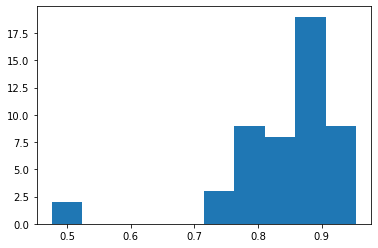

95.0 confidence interval apprx. 56.2% and 92.5%


In [62]:
pyplot.hist(results)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval apprx. %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Observation:

95% Confidence interval means mean(+/-) 2* Standard deviation So expected to be in range approximately 68 to 100% which is good and acceptable

Note : I've run the RandamizedSearchCV multiple times for both Random Forest and Gradient Boosting and finalized with the values that gave high change in accuracy. The values for randamizedsearchcv changes with every run

We can use Learning Curve to visualize the performance metric over a range of values for same hyperparameters to check whether the given data set is overfit or underfit

In [74]:
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
F:\PGP-AIML\Python_Projects\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was ex

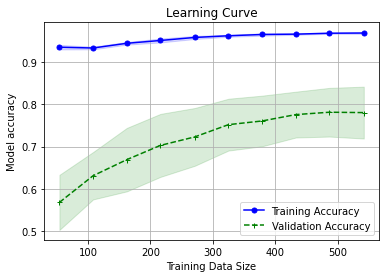

In [75]:
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Observation:

1. A good fit is identified by a training and validation loss that decreases to a point with a minimal gap between the two final  values.
2. From this we can say thatthe differnce in the model accuracy for train and validation becomes less when the values increases so we can say that it is neither a overfit nor underfit

Underfit -- if Training curve decreases and continues to decrease at the end to the plot
Overfit -- The Curve of training  continues to decrease.The Curve of validation  decreases to a point and begins increasing again.

Over Plot doesn't comes under the above two cases
